In [6]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(spark.sparkContext, 'b9ad6a31-ed3e-4d36-bb1e-3d16a3d0c2b3', 'p-d23153c79dd033e308fcbdebfb8a92fc4b3cb14e')
pc = project.project_context
url = project.get_file_url("698.edges")


In [7]:
url


'cos://ex5task2-donotdelete-pr-2utdjeammzuqbf.os_d9701e4c-ee17-444b-94ad-cfa2a60a10d8/698.edges'

In [8]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(spark.sparkContext, 'b9ad6a31-ed3e-4d36-bb1e-3d16a3d0c2b3', 'p-d23153c79dd033e308fcbdebfb8a92fc4b3cb14e')
pc = project.project_context
url = project.get_file_url("698.feat")

In [9]:
url


'cos://ex5task2-donotdelete-pr-2utdjeammzuqbf.os_d9701e4c-ee17-444b-94ad-cfa2a60a10d8/698.feat'

In [1]:
!pip install --upgrade --user pixiedust
#restart kernel now!


Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20200509135908-0005
KERNEL_ID = f7652983-cb06-4946-ae21-06b6d383c1c7
  Using cached https://files.pythonhosted.org/packages/dd/ba/a0e6866057fc0bbd17192925c1d63a3b85cf522965de9bc02364d08e5b84/lxml-4.5.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e4/8d/9e28e9af95739e6d2d2f8d4bef0b3432da40b7c3588fbad4298c1be09e48/geojson-2.5.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1a/70/1935c770cb3be6e3a8b78ced23d7e0f3b187f5cbfab4749523ed65d7c9b1/requests-2.23.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a4/63/eaec2bd025ab48c754b55e8819af0f6a69e2b1e187611dd40cbbe101ee7f/Markdown-3.2.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/pa

In [2]:
import pixiedust
#restart kernel now!


Pixiedust database opened successfully


In [3]:
from pixiedust.packageManager import PackageManager
pkg=PackageManager()
pkg.installPackage("graphframes:graphframes:0.8.0-spark2.4-s_2.11")
pkg.printAllPackages()

from pyspark import *
from pyspark.sql import *
sqlContext=SQLContext(sc)

Package already installed: graphframes:graphframes:0.8.0-spark2.4-s_2.11
graphframes:graphframes:0.8.0-spark2.4-s_2.11 => /home/spark/shared/user-libs/spark2/graphframes-0.8.0-spark2.4-s_2.11.jar


In [4]:
import os
#download graphframes package
!wget -q http://dl.bintray.com/spark-packages/maven/graphframes/graphframes/0.3.0-spark2.0-s_2.11/graphframes-0.3.0-spark2.0-s_2.11.jar -P /home/jovyan/
#tell to load graphframes and dependencies to the spark cluster for use
os.environ["PYSPARK_SUBMIT_ARGS"] = ' --packages graphframes:graphframes:0.3.0-spark2.0-s_2.11 --jars /home/jovyan/.ivy2/jars/com.typesafe.scala-logging_scala-logging-api_2.11-2.1.2.jar,/home/jovyan/.ivy2/jars/org.scala-lang_scala-reflect-2.11.0.jar,/home/jovyan/.ivy2/jars/com.typesafe.scala-logging_scala-logging-slf4j_2.11-2.1.2.jar,/home/jovyan/.ivy2/jars/org.slf4j_slf4j-api-1.7.7.jar,/home/jovyan/.ivy2/jars/graphframes_graphframes-0.3.0-spark2.0-s_2.11.jar pyspark-shell'

import pyspark
from pyspark.sql import *

try:
    sc = pyspark.SparkContext('local[*]',environment = {})
except:
    sc = sc
#create sqlcontext on the spark, enables the use of the SQL queries below
sqlContext = SQLContext(sc)

import pixiedust     #important, pixiedust must be initialized after pyspark, otherwise it just doesn't work right


In [10]:
#read graph edges(or arcs, lines) (multiple edges per vertex can exist)
lines = sc.textFile("cos://ex5task2-donotdelete-pr-2utdjeammzuqbf.os_d9701e4c-ee17-444b-94ad-cfa2a60a10d8/698.edges")
edges = lines.map(lambda l: l.split(" ")). \
            map(lambda p: Row( src=int(p[0]), dst=int(p[1])) )
edges = sqlContext.createDataFrame(edges)

#read graph vertices(or nodes, points) (these are unique)
lines = sc.textFile("cos://ex5task2-donotdelete-pr-2utdjeammzuqbf.os_d9701e4c-ee17-444b-94ad-cfa2a60a10d8/698.feat")
vertices = lines.map(lambda l: l.split(" ")). \
            map(lambda p: Row(id=int(p[0]), name="userid_"+p[0]) )
vertices = sqlContext.createDataFrame(vertices)    

# Create a GraphFrame
from graphframes import *
g = GraphFrame(vertices, edges)

#calculate pagerank
pagerank = g.pageRank(resetProbability=0.01, maxIter=20)
degrees = g.degrees

#join two results
result = pagerank.vertices.join(degrees,"id")
#print
result.select("name","pagerank","degree").orderBy("pagerank", ascending=False).show(100,False)

display(pagerank)


<IPython.core.display.Javascript object>


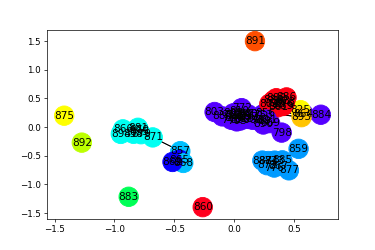

/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [11]:
%matplotlib notebook

import networkx as nx
import matplotlib.pyplot as plt
import numpy as nb

#readn graph edges(or arcs, lines) (multiple edges per vertex can exist)
lines = sc.textFile("cos://ex5task2-donotdelete-pr-2utdjeammzuqbf.os_d9701e4c-ee17-444b-94ad-cfa2a60a10d8/698.edges")
edges = lines.map(lambda l: l.split(" ")). \
            map(lambda p: Row( src=int(p[0]), dst=int(p[1])) )
edges = sqlContext.createDataFrame(edges)

#read graph vertices(or nodes, points) (these are unique)
lines = sc.textFile("cos://ex5task2-donotdelete-pr-2utdjeammzuqbf.os_d9701e4c-ee17-444b-94ad-cfa2a60a10d8/698.feat")
vertices = lines.map(lambda l: l.split(" ")). \
            map(lambda p: Row(id=int(p[0]), name="userid_"+p[0] ,features=[int(x) for x in p[1:]] ))
vertices = sqlContext.createDataFrame(vertices)    

# Create a GraphFrame
from graphframes import *
g = GraphFrame(vertices, edges)

#calculate simple clustering with the label propagation clustering alg.
lpa = g.labelPropagation(maxIter=5)
nodes = lpa.select("id","label")

#plotting, generate unique colors for each group -----------------------
G = nx.DiGraph()
for x in g.edges.collect():
    G.add_edges_from([(x[0],x[1])], weight=1)
for x in lpa.select("id","label").rdd.map(lambda r: ( int(r[0]),int(r[1])) ).collect():
    G.add_node(x[0],label=x[1])
grouplabels = [list(x[1].values())[0] for x in G.nodes(True)]
node_texts = {node:node for node in G.nodes()};
cmap = plt.get_cmap('gist_rainbow')
uniqlabels = nb.unique(grouplabels)
randvals = nb.random.random_sample((len(uniqlabels),1))
colorlut = dict(zip(uniqlabels,randvals))  
gcolors = []
for x in grouplabels:
    gcolors.append(cmap(float(colorlut[x])))
positions=nx.spring_layout(G,k=0.1,scale=1.5,iterations=20)
nx.draw_networkx(G,positions, labels=node_texts, node_color = gcolors, node_size=500,arrows=False)
#plotting end ----------------------------------------------------------



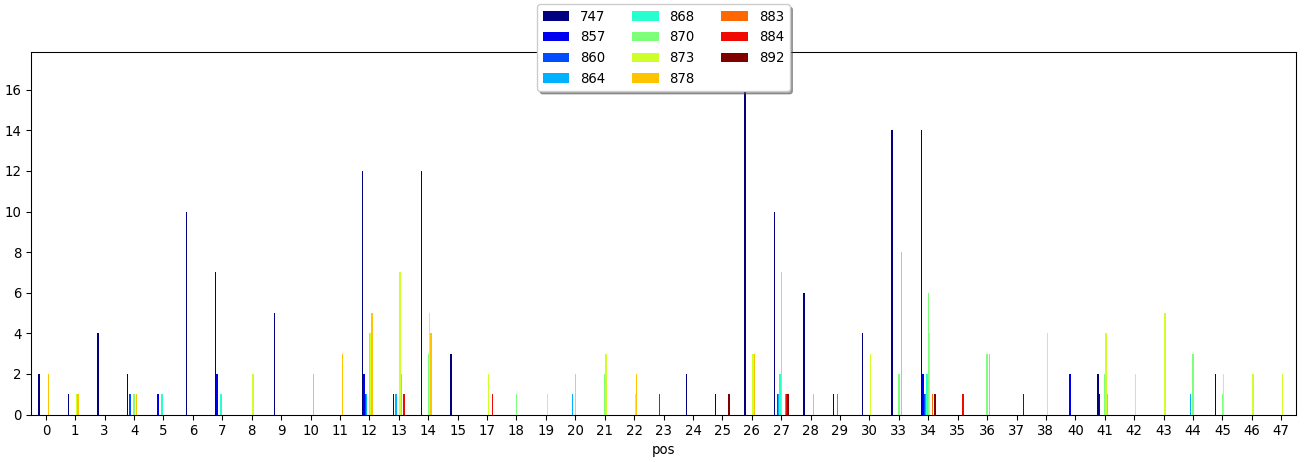

In [12]:
#line code explodes features into key values and duplicates label and ids
from pyspark.sql.functions import posexplode
#remove zeros from features to make histogram plotting easier
res = lpa.select('id','label',posexplode(lpa.features)).filter("col>0")
display(res)


In [13]:
lines = sc.textFile("cos://ex5task2-donotdelete-pr-2utdjeammzuqbf.os_d9701e4c-ee17-444b-94ad-cfa2a60a10d8/698.featnames")
edges = lines.map(lambda l: l.replace(";", " ").split(" ")). \
            map(lambda p: Row( pos=int(p[0]), featurename=(p[1]+" "+p[-1])) )
edges = sqlContext.createDataFrame(edges) 

edges.show()



+-------------+---+
|  featurename|pos|
+-------------+---+
|   birthday 2|  0|
|   birthday 3|  1|
|education 335|  2|
|education 336|  3|
| education 14|  4|
| education 22|  5|
|education 340|  6|
|education 341|  7|
|education 369|  8|
|education 342|  9|
|education 370| 10|
|education 348| 11|
| education 53| 12|
| education 54| 13|
| education 55| 14|
|education 350| 15|
| education 59| 16|
|education 255| 17|
| education 60| 18|
| education 61| 19|
+-------------+---+
only showing top 20 rows




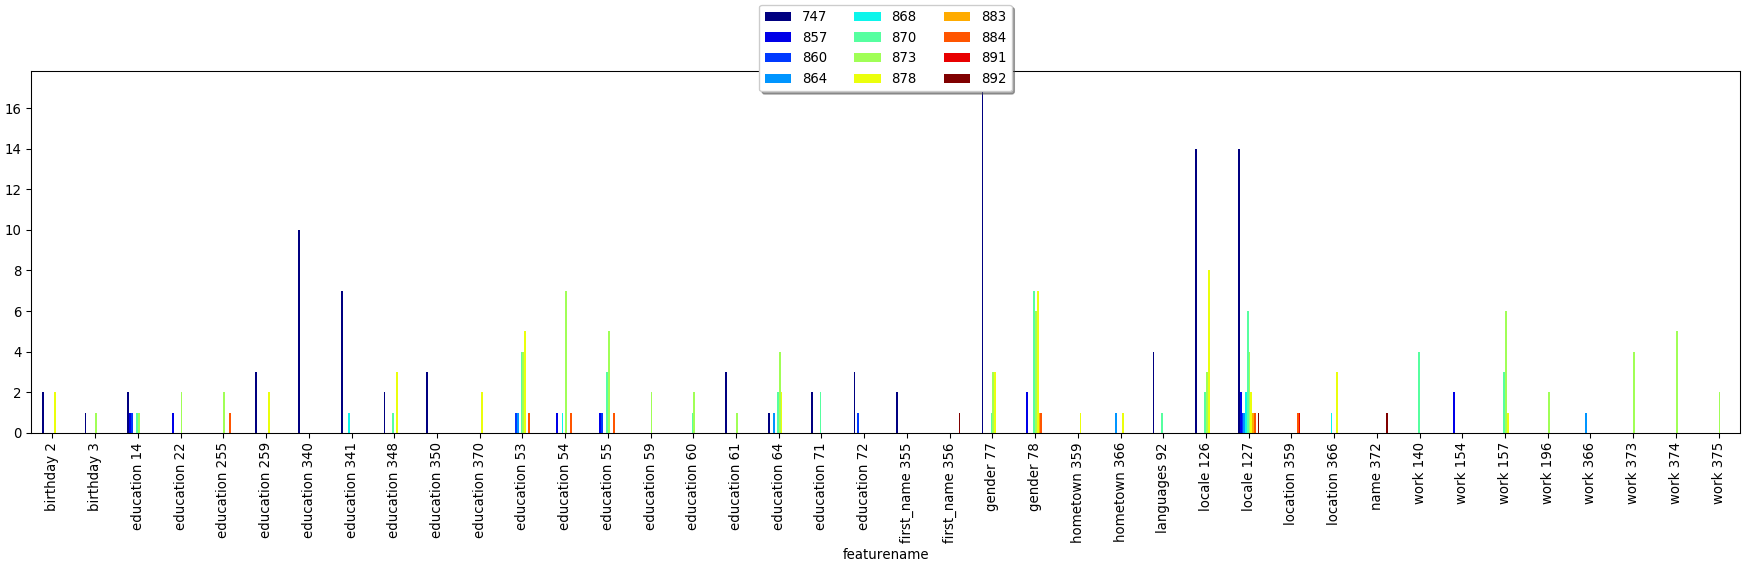

In [14]:
res=res.join(edges,"pos")
display(res)

In [16]:
uniqvals = res.select('label').distinct().rdd.map(lambda p: p[0]).collect()
res.persist() #looping queries following, store intermediate data
for x in uniqvals:
    print("Group: " + str(x) + "\n")
    ures = res.filter('label=' + str(x)).groupBy("featurename").sum("col").sort("sum(col)",ascending=False).rdd.map(lambda p: (p[0],p[1])).take(10)
    print(ures)
    print('\n')


Group: 857

[('work 154', 2), ('gender 78', 2), ('education 341', 2), ('education 53', 2), ('locale 127', 2), ('education 55', 1), ('work 157', 1), ('education 22', 1), ('education 54', 1), ('education 14', 1)]


Group: 883

[('gender 78', 1), ('locale 127', 1)]


Group: 891

[('gender 78', 1), ('locale 126', 1), ('location 359', 1)]


Group: 870

[('gender 78', 7), ('locale 127', 6), ('work 140', 4), ('education 53', 4), ('work 157', 3), ('work 366', 3), ('location 366', 3), ('education 55', 3), ('locale 126', 2), ('education 64', 2)]


Group: 747

[('gender 77', 17), ('locale 126', 14), ('locale 127', 14), ('education 53', 12), ('education 55', 12), ('education 340', 10), ('gender 78', 10), ('location 359', 7), ('education 341', 7), ('hometown 359', 6)]


Group: 884

[('gender 78', 1), ('education 54', 1), ('education 53', 1), ('locale 127', 1), ('location 359', 1), ('education 55', 1), ('education 255', 1)]


Group: 892

[('gender 78', 1), ('locale 127', 1), ('last_name 371', 1), ('